<a href="https://colab.research.google.com/github/pranavjain594/InternshipProject/blob/master/ProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Importing the dataset and the necessary libraries, check datatype, statistical summary, shape, null values etc.**

In [35]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [37]:
#importing dataset as data
data=pd.read_csv('data.csv')

In [38]:
#getting data information
data.describe()
data.head()
data.tail()
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

(11914, 16)

In [39]:
#getting non null data
data[data.notnull()]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [40]:
#checking for the null values as a boolean series
bool_series = pd.isnull(data)  
print(bool_series)

        Make  Model   Year  ...  city mpg  Popularity   MSRP
0      False  False  False  ...     False       False  False
1      False  False  False  ...     False       False  False
2      False  False  False  ...     False       False  False
3      False  False  False  ...     False       False  False
4      False  False  False  ...     False       False  False
...      ...    ...    ...  ...       ...         ...    ...
11909  False  False  False  ...     False       False  False
11910  False  False  False  ...     False       False  False
11911  False  False  False  ...     False       False  False
11912  False  False  False  ...     False       False  False
11913  False  False  False  ...     False       False  False

[11914 rows x 16 columns]


In [41]:
#getting the number of null values in each column
data.isnull().values.any()
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

## **2. Dropping Irrevelant Columns**

In [42]:
data.drop(['Market Category', 'Engine Fuel Type', 'Number of Doors'], axis=1,inplace=True)

## **3. Renaming the Columns**

In [43]:
data.rename(columns = {'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price'}, inplace = True) 
print(data.columns)

Index(['Make', 'Model', 'Year', 'HP', 'Cylinders', 'Transmission',
       'Drive Mode', 'Vehicle Size', 'Vehicle Style', 'MPG-H', 'MPG-C',
       'Popularity', 'Price'],
      dtype='object')


# 4. Check for any duplicates in the data check for null values and missing data and remove them.


In [44]:
#checking for the duplicate data and dropping the duplicates by just keeping the first row
len(data.duplicated())
data[data.duplicated()]
data.drop_duplicates(keep="first", inplace=True)

In [45]:
#check if there's any duplicate column
data.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [46]:
#imputing missing values with the mean value
data.fillna(data.mean(), inplace=True)
print(data.mean())
data.isnull().sum()
data.count()

Year           2010.683600
HP              252.510631
Cylinders         5.651551
MPG-H            26.666876
MPG-C            19.773782
Popularity     1556.819457
Price         41881.852005
dtype: float64


Make             11122
Model            11122
Year             11122
HP               11122
Cylinders        11122
Transmission     11122
Drive Mode       11122
Vehicle Size     11122
Vehicle Style    11122
MPG-H            11122
MPG-C            11122
Popularity       11122
Price            11122
dtype: int64

# 5. Plot graphs of various columns to check for outliers and remove those data points from the dataset.

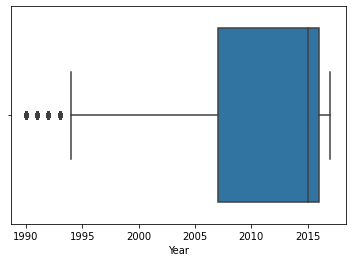

In [47]:
sns.boxplot(x=data['Year'])

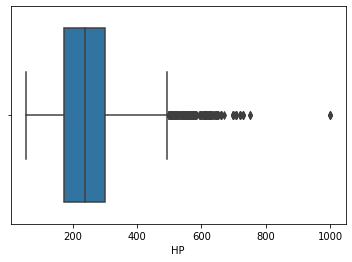

In [48]:
sns.boxplot(x=data['HP'])


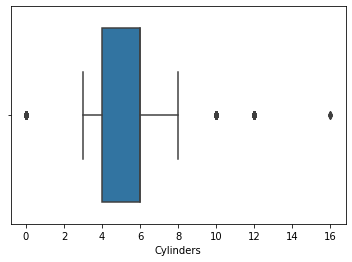

In [49]:
sns.boxplot(x=data['Cylinders'])

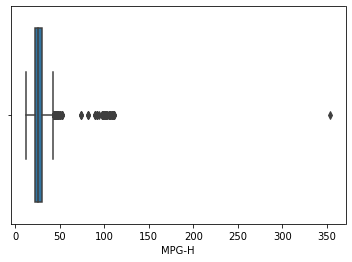

In [50]:
sns.boxplot(x=data['MPG-H'])

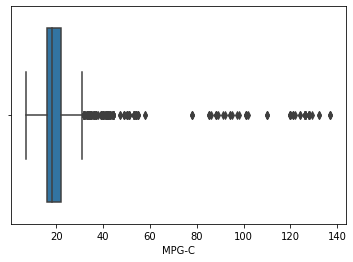

In [51]:
sns.boxplot(x=data['MPG-C'])

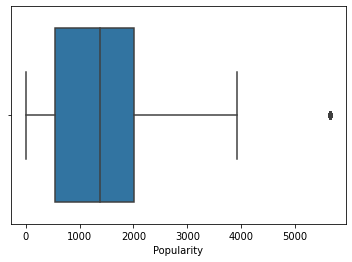

In [52]:
sns.boxplot(x=data['Popularity'])

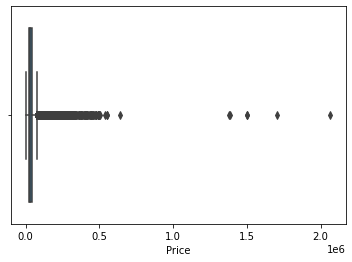

In [53]:
sns.boxplot(x=data['Price'])

In [54]:
#Removing outliers using IQR method    

#printing IQR values of different columns
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.0
HP              130.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1460.0
Price         21395.0
dtype: float64


In [55]:
#Eliminating the outliers
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(8576, 13)

# 6. What car brands are the most represented in the dataset and find the average price among the top car brands.

In [22]:
#FInding Car brand with maximum count in data
data['Make'].value_counts()

Chevrolet        1033
Toyota            569
Volkswagen        515
Nissan            513
GMC               469
Dodge             425
Mazda             397
Honda             373
Suzuki            339
Infiniti          322
Cadillac          300
Hyundai           242
Audi              240
Volvo             236
Acura             232
Subaru            220
BMW               218
Kia               216
Buick             184
Mitsubishi        179
Chrysler          173
Mercedes-Benz     171
Lexus             163
Pontiac           156
Lincoln           146
Saab              109
Oldsmobile        105
Land Rover         89
FIAT               59
Scion              55
Plymouth           43
Porsche            36
Lotus              20
HUMMER             17
Alfa Romeo          5
Maserati            4
Genesis             3
Name: Make, dtype: int64

In [56]:
#Finding average(mean) of price of the different car brands
data.groupby('Make')['Price'].mean()

Make
Acura            34663.448276
Alfa Romeo       61600.000000
Audi             45654.183333
BMW              48111.880734
Buick            29915.739130
Cadillac         49831.070000
Chevrolet        28207.045499
Chrysler         28723.664740
Dodge            26076.722353
FIAT             22206.016949
GMC              33261.400853
Genesis          46616.666667
HUMMER           36464.411765
Honda            27381.364611
Hyundai          25816.330579
Infiniti         43127.822981
Kia              25185.625000
Land Rover       45279.606742
Lexus            42610.257669
Lincoln          44543.164384
Lotus            61717.750000
Maserati         71000.000000
Mazda            20830.670025
Mercedes-Benz    49204.538012
Mitsubishi       22922.273743
Nissan           28352.543860
Oldsmobile       15632.200000
Plymouth          4141.348837
Pontiac          22652.615385
Porsche          51796.861111
Saab             27879.807339
Scion            20263.181818
Subaru           26161.459091
Suzuk

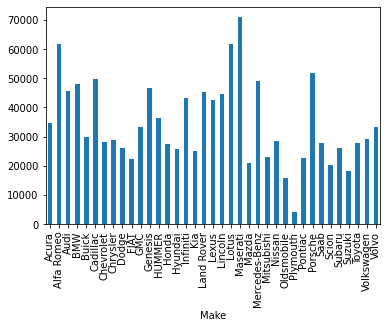

In [25]:
#Plotting the above calculated mean for each brand
data.groupby('Make')['Price'].mean().plot(kind='bar')
plt.show()

# 7. Plot the correlation matrix and document your insights.

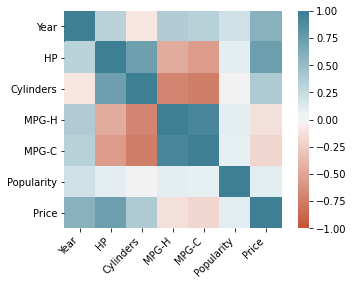

In [26]:
#Plotting correlation matrix using heatmap.
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
   

# 8. Perform EDA and plot different plots like scatterplots, heat maps etc and document your findings

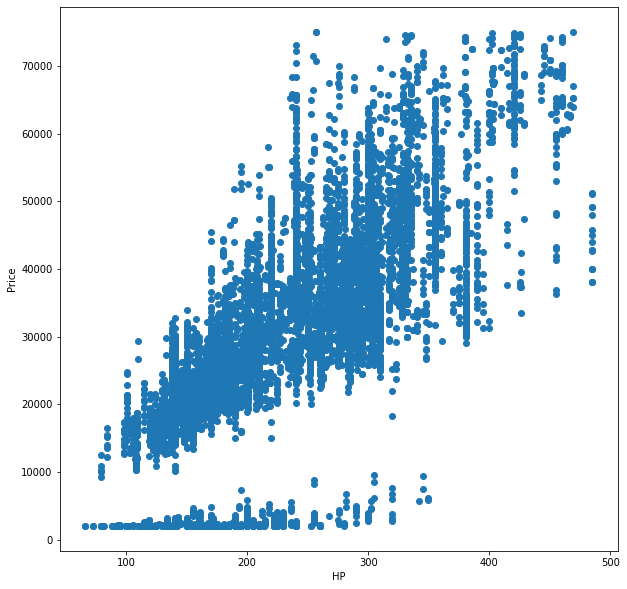

In [27]:
#SCATTERPLOT 

#HP vs Price
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(data['HP'], data['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()


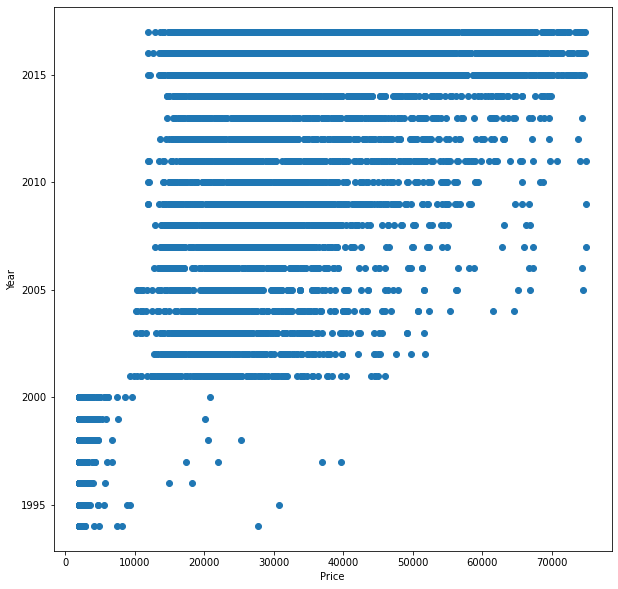

In [28]:
#Price vs Year
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(data['Price'],data['Year'])
ax.set_xlabel('Price')
ax.set_ylabel('Year')
plt.show()


,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.324788,-0.106283,0.373126,0.335017,0.200499,0.592008
HP,0.324788,1.000000,0.733925,-0.453004,-0.554167,0.095082,0.745056
Cylinders,-0.106283,0.733925,1.000000,-0.691270,-0.746203,0.012903,0.388768
MPG-H,0.373126,-0.453004,-0.691270,1.000000,0.937005,0.094043,-0.120851
MPG-C,0.335017,-0.554167,-0.746203,0.937005,1.000000,0.082408,-0.196935
Popularity,0.200499,0.095082,0.012903,0.094043,0.082408,1.000000,0.112513
Price,0.592008,0.745056,0.388768,-0.120851,-0.196935,0.112513,1.000000


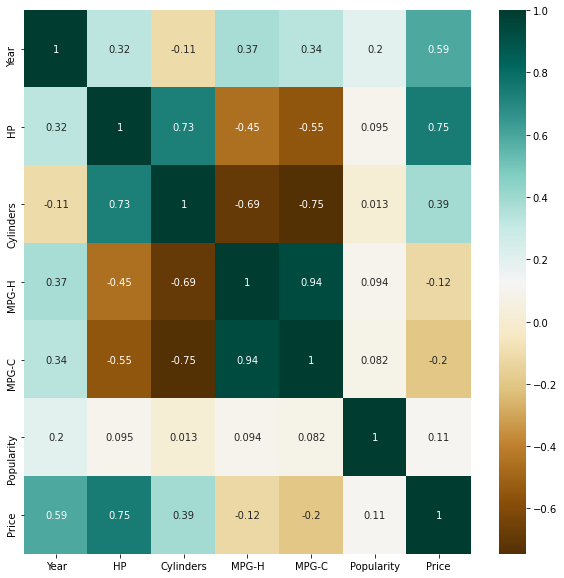

In [29]:
#HEATMAP
plt.figure(figsize=(10,10))
c= data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

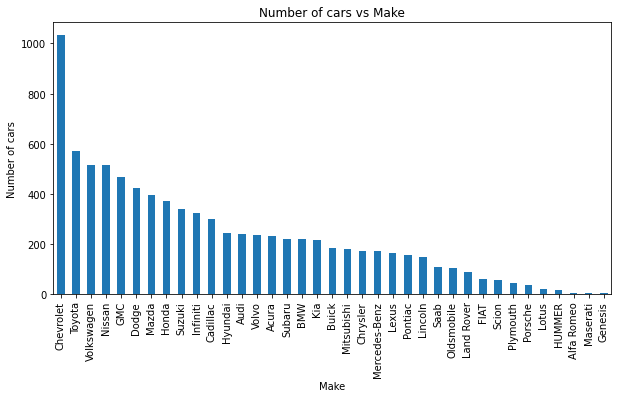

In [30]:
#Plotting Histogram
data.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of cars vs Make')
plt.ylabel('Number of cars')
plt.xlabel('Make');

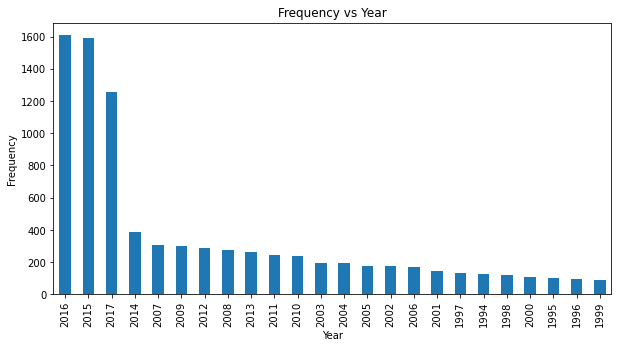

In [31]:
data.Year.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Frequency vs Year')
plt.ylabel('Frequency')
plt.xlabel('Year');


Observations from the Exploratory Data Analysis (EDA):-
1. 1st Scatterplot shows that, price of the car varies with it's horsepower i.e.There is some linearity between them. 
2. 2nd Scatterplot shows that, with the increasing year, the range of car prices have also been increased.
3. It can be clearly seen from heatmap that Price is affected by some features such as Engine Size, HP, and Cylinders.
4. It can be seen from histogram that Chevrolet has highest no. of cars. Also most cars are 2015 and 2016 model.
